````
Лабораторная работа №4
````

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

```
Задание №1
```

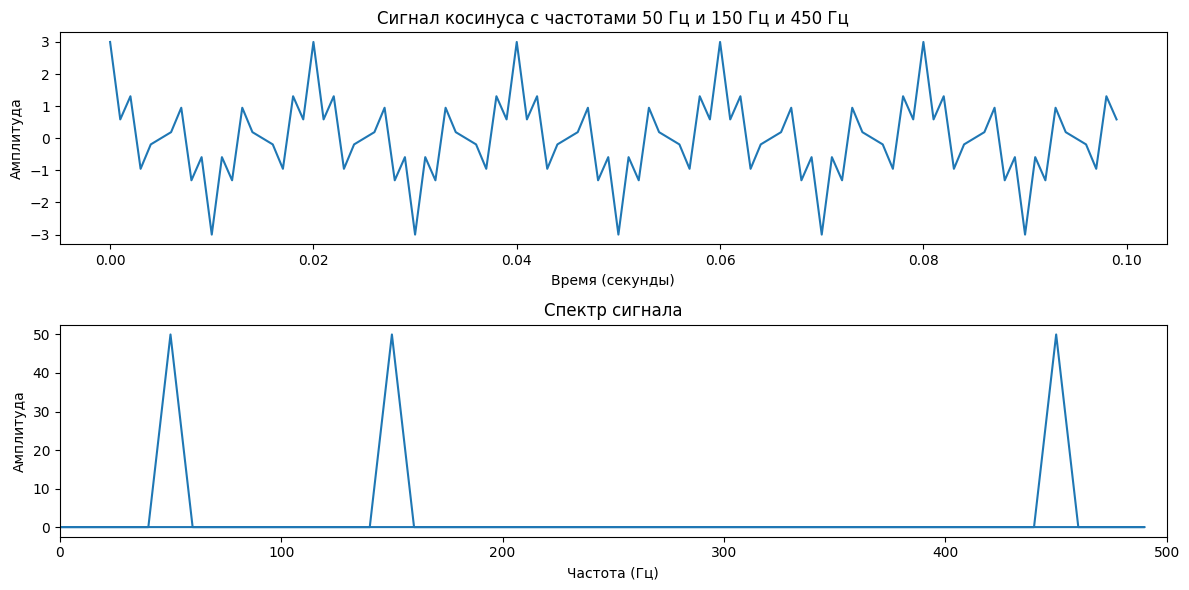

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем сигнал
fs = 1000  #Гц
t = np.linspace(0, 0.1, int(fs * 0.1), endpoint=False) # Временная шкала 1 секунда
signal = np.cos(2 * np.pi * 50 * t) + np.cos(2 * np.pi * 150 * t) + np.cos(2 * np.pi * 450 * t)

fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(fft_result), 1 / fs) 
signal_spectrum = np.abs(np.fft.fft(signal))

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(t, signal)
plt.title('Сигнал косинуса с частотами 50 Гц и 150 Гц и 450 Гц')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.subplot(2,1,2)
# Построим спектр сигнала

plt.plot(fft_freqs, signal_spectrum)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр сигнала')
plt.xlim(0,500)

plt.tight_layout()
plt.show()


````
Задание №2
````

/home/kvasik/environments/my_env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


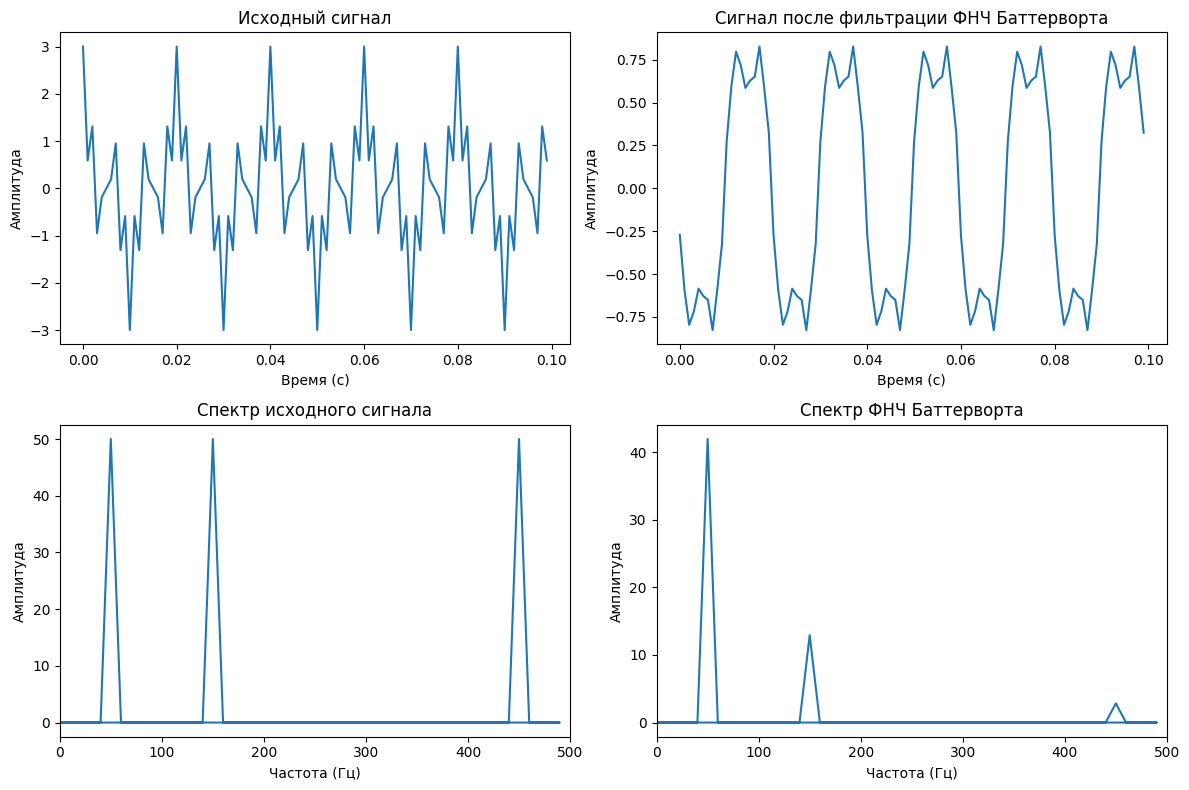

In [4]:
# Создаем ФНЧ Баттерворта
wc = 120  # Частота среза фильтра (в Гц)
w = np.linspace(0, 2 * wc, len(t))  # Массив частот такой же длины, как и сигнал
H = wc**2 / (-1j * 2 * np.sqrt(2) * wc * fft_freqs - fft_freqs**2 + 1)

# Применяем фильтр к сигналу в частотной области
filtered_signal = np.fft.ifft(np.fft.fft(signal) * H)

# Вычисляем спектр фильтра Баттерворта
filter_spectrum = np.abs(H)

# Создаем график
plt.figure(figsize=(12, 8))

# Подграфик 1: Исходный сигнал
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал после фильтрации ФНЧ Баттерворта')

# Подграфик 3: Спектр исходного сигнала
plt.subplot(2, 2, 3)
plt.plot(np.fft.fftfreq(len(t), 1 / fs), signal_spectrum)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр исходного сигнала')
plt.xlim(0,500)

# Подграфик 4: Спектр ФНЧ Баттерворта
plt.subplot(2, 2, 4)
plt.plot(np.fft.fftfreq(len(t), 1 / fs), np.abs(np.fft.fft(filtered_signal)))
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр ФНЧ Баттерворта')
plt.xlim(0,500)

plt.tight_layout()
plt.show()


````
Задание №3
````

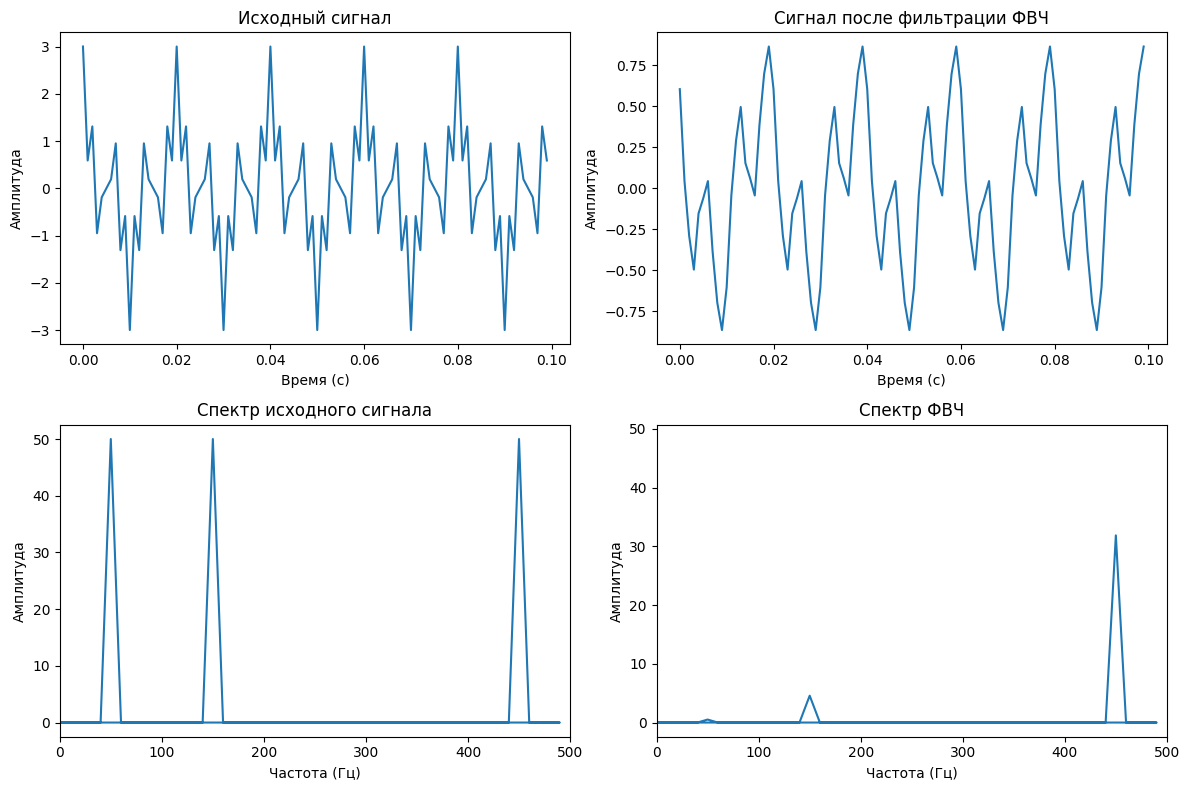

In [6]:
H = w**2 / ((-wc**2) + 1j*np.sqrt(2) * wc * w + w**2)

# Применяем фильтр к сигналу в частотной области
filtered_signal = np.fft.ifft(np.fft.fft(signal) * H)

# Вычисляем спектр фильтра Баттерворта
filter_spectrum = np.abs(H)

# Создаем график
plt.figure(figsize=(12, 8))

# Подграфик 1: Исходный сигнал
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')

# Подграфик 2: Отфильтрованный сигнал
plt.subplot(2, 2, 2)
plt.plot(t, filtered_signal)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал после фильтрации ФВЧ')

# Подграфик 3: Спектр исходного сигнала
plt.subplot(2, 2, 3)
plt.plot(np.fft.fftfreq(len(t), 1 / fs), signal_spectrum)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр исходного сигнала')
plt.xlim(0,500)

# Подграфик 4: Спектр ФНЧ Баттерворта
plt.subplot(2, 2, 4)
plt.plot(np.fft.fftfreq(len(t), 1 / fs), np.abs(np.fft.fft(filtered_signal)))
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр ФВЧ')
plt.xlim(0,500)

plt.tight_layout()
plt.show()
